In [31]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve, auc, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [7]:
df = pd.read_csv('C:\\Users\\user\\Desktop\\zz\\heart.csv')

In [8]:
df.shape

(298, 19)

In [9]:
df.dtypes

age                      int64
sex                      int64
cp                       int64
trestbps                 int64
chol                     int64
fbs                      int64
restecg                  int64
thalach                  int64
exang                    int64
oldpeak                float64
slope                    int64
ca                       int64
thal                     int64
target                   int64
normalized_age         float64
normalized_chol          int64
normalized_trestbps      int64
normalized_thalach     float64
normalized_oldpeak     float64
dtype: object

Data statistics such as the mean, median, and percentiles

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,normalized_age,normalized_chol,normalized_trestbps,normalized_thalach,normalized_oldpeak
count,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,2.980000e+02,2.980000e+02
mean,54.510067,0.677852,0.959732,131.580537,246.906040,0.147651,0.523490,149.466443,0.328859,1.055369,1.395973,0.674497,2.312081,0.540268,0.224832,1.355705,2.426174,-1.490232e-17,5.960929e-17
std,9.030526,0.468085,1.033963,17.669293,51.893097,0.355350,0.526521,22.983830,0.470589,1.164162,0.617574,0.938202,0.614024,0.499214,0.312734,0.743763,1.410490,1.001682e+00,1.001682e+00
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.419727e+00,-9.080729e-01
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,1.000000,2.000000,-7.176411e-01,-9.080729e-01
50%,56.000000,1.000000,1.000000,130.000000,241.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000,0.000000,2.000000,3.000000,1.322086e-01,-2.197277e-01
75%,61.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,165.750000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000,0.333333,2.000000,4.000000,7.096706e-01,4.686176e-01
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000,1.000000,2.000000,4.000000,2.289519e+00,4.426603e+00


First 5 items in the dataset:

In [11]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,normalized_age,normalized_chol,normalized_trestbps,normalized_thalach,normalized_oldpeak
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,0.666667,1,4,0.807730,-0.047641
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,0.000000,1,3,0.241164,1.759265
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,0.000000,0,3,-1.066297,1.329049
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,0.333333,1,3,0.502656,-0.908073
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,1.000000,2,2,-1.894356,0.726747


<hr style="border:none; height:0.9px;" />

# Preprocessing

Cleaning data and scaling it for better performance.

In [12]:
df.isna().sum()

age                    0
sex                    0
cp                     0
trestbps               0
chol                   0
fbs                    0
restecg                0
thalach                0
exang                  0
oldpeak                0
slope                  0
ca                     0
thal                   0
target                 0
normalized_age         0
normalized_chol        0
normalized_trestbps    0
normalized_thalach     0
normalized_oldpeak     0
dtype: int64

In [13]:
cols = ['age', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

scaler = StandardScaler()

for col in cols:
    df[[col]] = scaler.fit_transform(df[[col]])

In [14]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,normalized_age,normalized_chol,normalized_trestbps,normalized_thalach,normalized_oldpeak
0,-0.278421,1,-0.929768,-0.373054,-0.673784,-0.416207,0.906539,0.807730,-0.700000,-0.047641,0.979709,1.415189,1.122231,0,0.666667,1,4,0.807730,-0.047641
1,-0.167499,1,-0.929768,0.477304,-0.847510,2.402650,-0.995916,0.241164,1.428571,1.759265,-2.264216,-0.720134,1.122231,0,0.000000,1,3,0.241164,1.759265
2,1.718171,1,-0.929768,0.760757,-1.407291,-0.416207,0.906539,-1.066297,1.428571,1.329049,-2.264216,-0.720134,1.122231,0,0.000000,0,3,-1.066297,1.329049
3,0.719875,1,-0.929768,0.930829,-0.847510,-0.416207,0.906539,0.502656,-0.700000,-0.908073,0.979709,0.347527,1.122231,0,0.333333,1,3,0.502656,-0.908073
4,0.830797,0,-0.929768,0.363923,0.909045,2.402650,0.906539,-1.894356,-0.700000,0.726747,-0.642254,2.482850,-0.509110,0,1.000000,2,2,-1.894356,0.726747


Below I'll use a box plot to see if the data is imbalanced:

In [15]:
fig = px.histogram(df, x=df['target'], template='plotly_dark', nbins=2, width=800, height=400)
fig.update_layout(title='Data balance')
fig.show()

As we can see, the proportions aren't very off and the data seems to be balanced well.

<hr style="border:none; height:0.9px;" />

# Dimension Reduction

Reducing the data dimension and noise to cluster targets using KMeans in a later graph.

In [16]:
pca = PCA(n_components=5)
ndf = df.drop(labels='target', axis=1)

pca_df = pca.fit_transform(ndf)

# create range enumerating pca feats
features = range(pca.n_components_)

fig = px.bar(x=features, y=pca.explained_variance_, template='plotly_dark', width=700)
fig.update_layout(title='PCA Features')
fig.show()

<hr style="border:none; height:0.9px;" />

# Choosing a model

Evaluating performance of models to choose from. Note decision tree classifier performed well but I'll use logisic regression instead

In [17]:
X = df.drop(labels='target', axis=1).values
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12, test_size=0.2)

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import plotly.express as px
# Dictionary to store regression models
models = {
    'Linear Regression': LinearRegression(),
    'KNN Regression': KNeighborsRegressor(),
    'SVM Regression': SVR(kernel='rbf'),
    'Random Forest Regression': RandomForestRegressor(n_estimators=100, random_state=12)
}

results = []

# Train and evaluate each model using cross-validation
for name, model in models.items():
    kf = KFold(n_splits=5, shuffle=True, random_state=12)
    cv_results = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
    cv_results = np.sqrt(-cv_results)  # Convert negative MSE to RMSE
    results.append(cv_results)

# Create a DataFrame for the results
df = pd.DataFrame(results).T
df.columns = models.keys()

# Melt the DataFrame for visualization
df_melted = pd.melt(df, var_name='Models', value_name='Scores')

# Plot the results
fig = px.box(df_melted, x='Models', y='Scores', facet_col='Models', template='plotly_dark')
fig.update_xaxes(showticklabels=False)
fig.update_layout(title='Regression Model Comparison', yaxis_title='RMSE')
fig.show()

In the chart above, we can see each model's bar diagram along with the median score depicted by the orange line.

KNN and LogisitcRegression both have accuracies ranging between 84 and 86%, while the decision tree seems to be up around 98%.

<hr style="border:none; height:0.9px;" />

# Logisitc Regression

In [19]:
logreg = LogisticRegression()
scaler = StandardScaler()

In [20]:
pipeline = make_pipeline(scaler, logreg)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

y_pred_proba = pipeline.predict_proba(X_test)[:, 1] # slice second class positive

testing_accuracy = pipeline.score(X_test, y_test)
training_accuracy = pipeline.score(X_train, y_train)

print(classification_report(y_test, y_pred))
print('\n')
print(f'Training accuracy: {training_accuracy}')
print(f'Testing accuracy: {testing_accuracy}')

              precision    recall  f1-score   support

           0       0.72      0.82      0.77        22
           1       0.89      0.82      0.85        38

    accuracy                           0.82        60
   macro avg       0.80      0.82      0.81        60
weighted avg       0.82      0.82      0.82        60



Training accuracy: 0.8781512605042017
Testing accuracy: 0.8166666666666667


The precision and recall aren't terrible but definitely could be improved.

Below I'll create a ROC curve and find the AUC as well as plot a confusion matrix.

In [21]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500, template='plotly_dark'
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

In [22]:
print(f'AUC score: {roc_auc_score(y_pred, y_pred_proba)}')

AUC score: 1.0


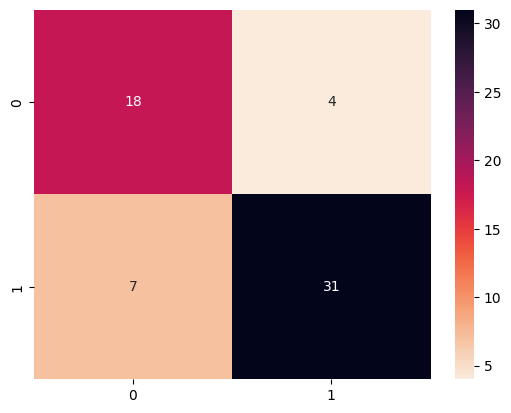

In [23]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap='rocket_r')
plt.show()

<hr style="border:none; height:0.9px;" />

# Clustering positive and negative cases

By using the elbow method below, I found the optimal number of clusters with the inertia lowering gradually to be 3. In this case however, I'll use two clusters for binary classification as I'm only interested in clustering positive and negative cases.

In [34]:
ks = range(1, 6)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    
    model.fit(pca_df)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

fig = px.line(x=ks, y=inertias, markers=True, title='Optimal number of clusters', template='plotly_dark')
fig.update_layout(title='Number of clusters vs Inertia')
fig.update_xaxes(title_text="Number of clusters")
fig.update_yaxes(title_text="Inertia")
fig.show()

#### K Means

In [25]:
model = KMeans(n_clusters=2)

cluster_labels = model.fit_predict(pca_df)

centroids = model.cluster_centers_

centroids_x = centroids[:, 0]
centroids_y = centroids[:, 1]

label_dict = {0: 'Negative cases', 1: 'Positive cases'}

fig = px.scatter(pca_df, x=pca_df[:, 0], y=pca_df[:, 1], color=cluster_labels, template='plotly_dark')
fig.update_layout(title='Clusters of positive and negative diagnosis')
fig.update_layout(xaxis_visible=False, yaxis_visible=False, 
                  xaxis=dict(showgrid=False, zeroline=False), 
                  yaxis=dict(showgrid=False, zeroline=False))
fig.add_trace(go.Scatter(x=centroids_x, y=centroids_y, mode='markers', 
                         marker=dict(color='red', size=6)))
fig.show()

#### K-medoids clustering:

In [26]:
from sklearn_extra.cluster import KMedoids
import plotly.express as px
import plotly.graph_objects as go

ks = range(1, 6)
inertias_kmedoids = []

for k in ks:
    model = KMedoids(n_clusters=k)
    model.fit(pca_df)
    inertias_kmedoids.append(model.inertia_)

fig = px.line(x=ks, y=inertias_kmedoids, markers=True, title='Optimal number of clusters for K-medoids', template='plotly_dark')
fig.update_layout(title='Number of clusters vs Inertia (K-medoids)')
fig.update_xaxes(title_text="Number of clusters")
fig.update_yaxes(title_text="Inertia")
fig.show()

model = KMedoids(n_clusters=2)
cluster_labels = model.fit_predict(pca_df)
centroids = model.cluster_centers_

centroids_x = centroids[:, 0]
centroids_y = centroids[:, 1]

fig = px.scatter(pca_df, x=pca_df[:, 0], y=pca_df[:, 1], color=cluster_labels, template='plotly_dark')
fig.update_layout(title='K-medoids clusters of positive and negative diagnosis')
fig.update_layout(xaxis_visible=False, yaxis_visible=False, 
                  xaxis=dict(showgrid=False, zeroline=False), 
                  yaxis=dict(showgrid=False, zeroline=False))
fig.add_trace(go.Scatter(x=centroids_x, y=centroids_y, mode='markers', 
                         marker=dict(color='red', size=6)))
fig.show()


#### Hierarchical clustering:

In [28]:
# Hierarchical Clustering
hierarchical_model = AgglomerativeClustering(n_clusters=2)
hierarchical_labels = hierarchical_model.fit_predict(pca_df)

fig = px.scatter(x=pca_df[:, 0], y=pca_df[:, 1], color=hierarchical_labels, template='plotly_dark')
fig.update_layout(title='Hierarchical Clusters of positive and negative diagnosis')
fig.update_layout(xaxis_visible=False, yaxis_visible=False, xaxis=dict(showgrid=False, zeroline=False), yaxis=dict(showgrid=False, zeroline=False))
fig.show()

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import precision_recall_fscore_support
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Load the dataset
data = pd.read_csv('C:\\Users\\user\\Desktop\\zz\\heart.csv')

# Data cleaning
# Check for missing values
missing_values = data.isnull().sum()

# Data preprocessing
# Replace missing values with the mean of the respective column
data.fillna(data.mean(), inplace=True)

# Feature Selection
X = data.drop('target', axis=1)
y = data['target']

# Selecting the top 5 features
best_features = SelectKBest(score_func=f_classif, k=5)
X = best_features.fit_transform(X, y)

# Data Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model 1: Decision Tree
param_grid_tree = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4]
}

grid_search_tree = GridSearchCV(DecisionTreeClassifier(random_state=122), param_grid_tree, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_tree.fit(X_train, y_train)
best_tree = grid_search_tree.best_estimator_

# Model 2: Random Forest
param_grid_forest = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4],
    'max_features': ['sqrt', 'log2']
}

grid_search_forest = GridSearchCV(RandomForestClassifier(random_state=122), param_grid_forest, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_forest.fit(X_train, y_train)
best_forest = grid_search_forest.best_estimator_

# Model 3: K-Nearest Neighbors
param_grid_knn = {
    'n_neighbors': range(1, 21),
    'p': [1, 2]
}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(X_train, y_train)
best_knn = grid_search_knn.best_estimator_

# Model 4: Neural Network
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (150,)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'max_iter': [200, 300]
}

grid_search_mlp = GridSearchCV(MLPClassifier(random_state=122), param_grid_mlp, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_mlp.fit(X_train, y_train)
best_mlp = grid_search_mlp.best_estimator_

# Performance Evaluation
def performance_evaluation(X, y, clf, classifier_name=''):
    y_pred = clf.predict(X)
    accuracy = clf.score(X, y)
    precision, recall, fscore, support = precision_recall_fscore_support(y, y_pred, average='weighted', zero_division=0)
    metricName = ['Accuracy', 'Precision', 'Recall', 'F1_Score']
    metricValue = [accuracy, precision, recall, fscore]
    res = pd.DataFrame(metricValue, index=metricName, columns=[classifier_name])
    return res

tree_summary = performance_evaluation(X_test, y_test, best_tree, 'Decision Tree')
forest_summary = performance_evaluation(X_test, y_test, best_forest, 'Random Forest')
knn_summary = performance_evaluation(X_test, y_test, best_knn, 'K-Nearest Neighbors')
mlp_summary = performance_evaluation(X_test, y_test, best_mlp, 'Neural Network')

# Combine the summary of each model into a dataframe
comparison_df = pd.concat([tree_summary, forest_summary, knn_summary, mlp_summary], axis=1)

# Display the summary dataframe
print(comparison_df)

           Decision Tree  Random Forest  K-Nearest Neighbors  Neural Network
Accuracy        0.750000       0.766667             0.783333        0.850000
Precision       0.762514       0.775556             0.789062        0.849714
Recall          0.750000       0.766667             0.783333        0.850000
F1_Score        0.751044       0.767708             0.784242        0.849616
(4, 4)
